<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Предварительный-анализ-данных" data-toc-modified-id="Предварительный-анализ-данных-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Предварительный анализ данных</a></span></li><li><span><a href="#Кодирование-переменных" data-toc-modified-id="Кодирование-переменных-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Кодирование переменных</a></span></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Выводы</a></span></li></ul></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span><ul class="toc-item"><li><span><a href="#Анализ-дисбаланса" data-toc-modified-id="Анализ-дисбаланса-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Анализ дисбаланса</a></span></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Выводы</a></span></li></ul></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span><ul class="toc-item"><li><span><a href="#Исправление-дисбаланса-в-модели-случайного-леса" data-toc-modified-id="Исправление-дисбаланса-в-модели-случайного-леса-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Исправление дисбаланса в модели случайного леса</a></span></li><li><span><a href="#Исправление-дисбаланса-в-алгоритме-регрессии" data-toc-modified-id="Исправление-дисбаланса-в-алгоритме-регрессии-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Исправление дисбаланса в алгоритме регрессии</a></span></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Выводы</a></span></li></ul></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Итоговые-выводы" data-toc-modified-id="Итоговые-выводы-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Итоговые выводы</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

## Подготовка данных

**Импорт используемых в проекте библиотек**

In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder,MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,f1_score,classification_report,precision_recall_curve,roc_curve,roc_auc_score
from sklearn.utils import shuffle
from sklearn.linear_model import LogisticRegression


pd.set_option('display.float_format','{:,}'.format)
pd.set_option('display.precision',2)

**Импорт данных**

In [35]:
try:
    df = pd.read_csv('/datasets/Churn.csv')
except:
    df = pd.read_csv('churn.csv')

### Предобработка данных

In [36]:
display(df.head())

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.0,1,1,1,"101,348.88",1
1,2,15647311,Hill,608,Spain,Female,41,1.0,"83,807.86",1,0,1,"112,542.58",0
2,3,15619304,Onio,502,France,Female,42,8.0,"159,660.8",3,1,0,"113,931.57",1
3,4,15701354,Boni,699,France,Female,39,1.0,0.0,2,0,0,"93,826.63",0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,"125,510.82",1,1,1,"79,084.1",0


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


Выявленные проблемы в данных:
- Пропуски в столбце Tenure
- Неправильный формат названий колонок
- Неправильные типы данных в колонках

**Исправление формата названий колонок**

In [38]:
columns = pd.Series(df.columns).str.lower()

In [39]:
df.columns = ['row_number', 'customer_id', 'surname', 'credit_score', 'geography',
       'gender', 'age', 'tenure', 'balance', 'num_of_products', 'has_cr_card',
       'is_active_member', 'estimated_salary', 'exited']

**Исправление типов данных**

In [40]:
df['has_cr_card'] = df['has_cr_card'].astype('bool')
df['is_active_member'] = df['is_active_member'].astype('bool')
df['exited'] = df['exited'].astype('bool')

**Заполнение пропусков**

count             9,091.0
mean    4.997690023099769
std     2.894723234821247
min                   0.0
25%                   2.0
50%                   5.0
75%                   7.0
max                  10.0
Name: tenure, dtype: float64

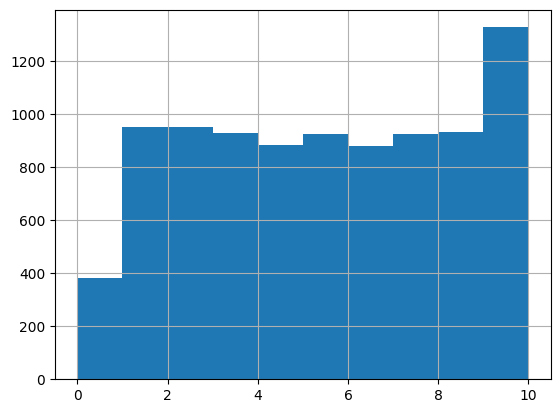

In [41]:
df['tenure'].hist()
df['tenure'].describe()

Так как данные распределены нормально - можно заполнить пропуски простым средним

<AxesSubplot:>

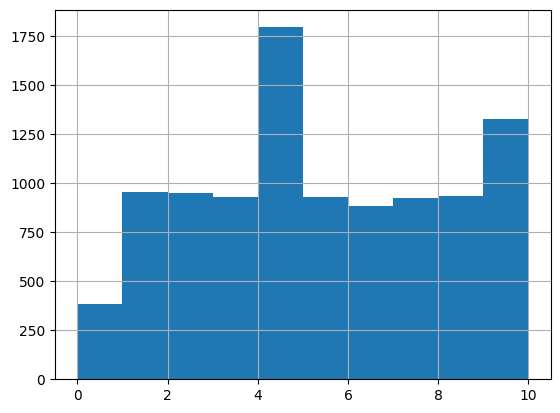

In [42]:
df.loc[df['tenure'].isna(),'tenure'] = df['tenure'].mean()
df['tenure'].hist()

**Проверка данных на дубликаты**

In [43]:
print(df.duplicated().sum())

0


Явные дубликаты отсутствуют.

In [44]:
df.nunique()

row_number          10000
customer_id         10000
surname              2932
credit_score          460
geography               3
gender                  2
age                    70
tenure                 12
balance              6382
num_of_products         4
has_cr_card             2
is_active_member        2
estimated_salary     9999
exited                  2
dtype: int64

In [45]:
print(df['balance'].value_counts())

0.0           3617
105,473.74       2
130,170.82       2
72,594.0         1
139,723.9        1
              ... 
130,306.49       1
92,895.56        1
132,005.77       1
166,287.85       1
104,001.38       1
Name: balance, Length: 6382, dtype: int64


У двух пар людей одинаковый баланс - необходимо проверить на неявные дубли. Интересно, что у более 3500 клиентов баланс равен нулю - возможно, эти клиенты уже ушли.

In [46]:
display(df.loc[df['balance'] == 105473.74])
print()
print()
display(df.loc[df['balance'] == 130170.82])

,row_number,customer_id,surname,credit_score,geography,gender,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited
9127,9128,15643487,Sal,630,Spain,Male,39,10.0,"105,473.74",1,False,False,"58,854.88",True
9714,9715,15681274,Marshall,726,Spain,Female,56,2.0,"105,473.74",1,True,True,"46,044.7",False


,row_number,customer_id,surname,credit_score,geography,gender,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited
927,928,15633461,Pai,639,Germany,Male,38,5.0,"130,170.82",1,True,True,"149,599.62",False
4961,4962,15632521,Cattaneo,689,Germany,Male,45,0.0,"130,170.82",2,True,False,"150,856.38",False


По большинству прочих признакам эти люди различаются. Одинаковые балансы выглядят как совпадение. Явных и неявных дубликатов не выявлено.

Данные были проанализированы на предмет дубликатов, пропусков, стиля названий колонок и типов данных. Где необходимо - была проведена предобработка. Основной изменение - для пропусков в столбце Tenure было проставлено значение среднего по столбцу.

### Предварительный анализ данных

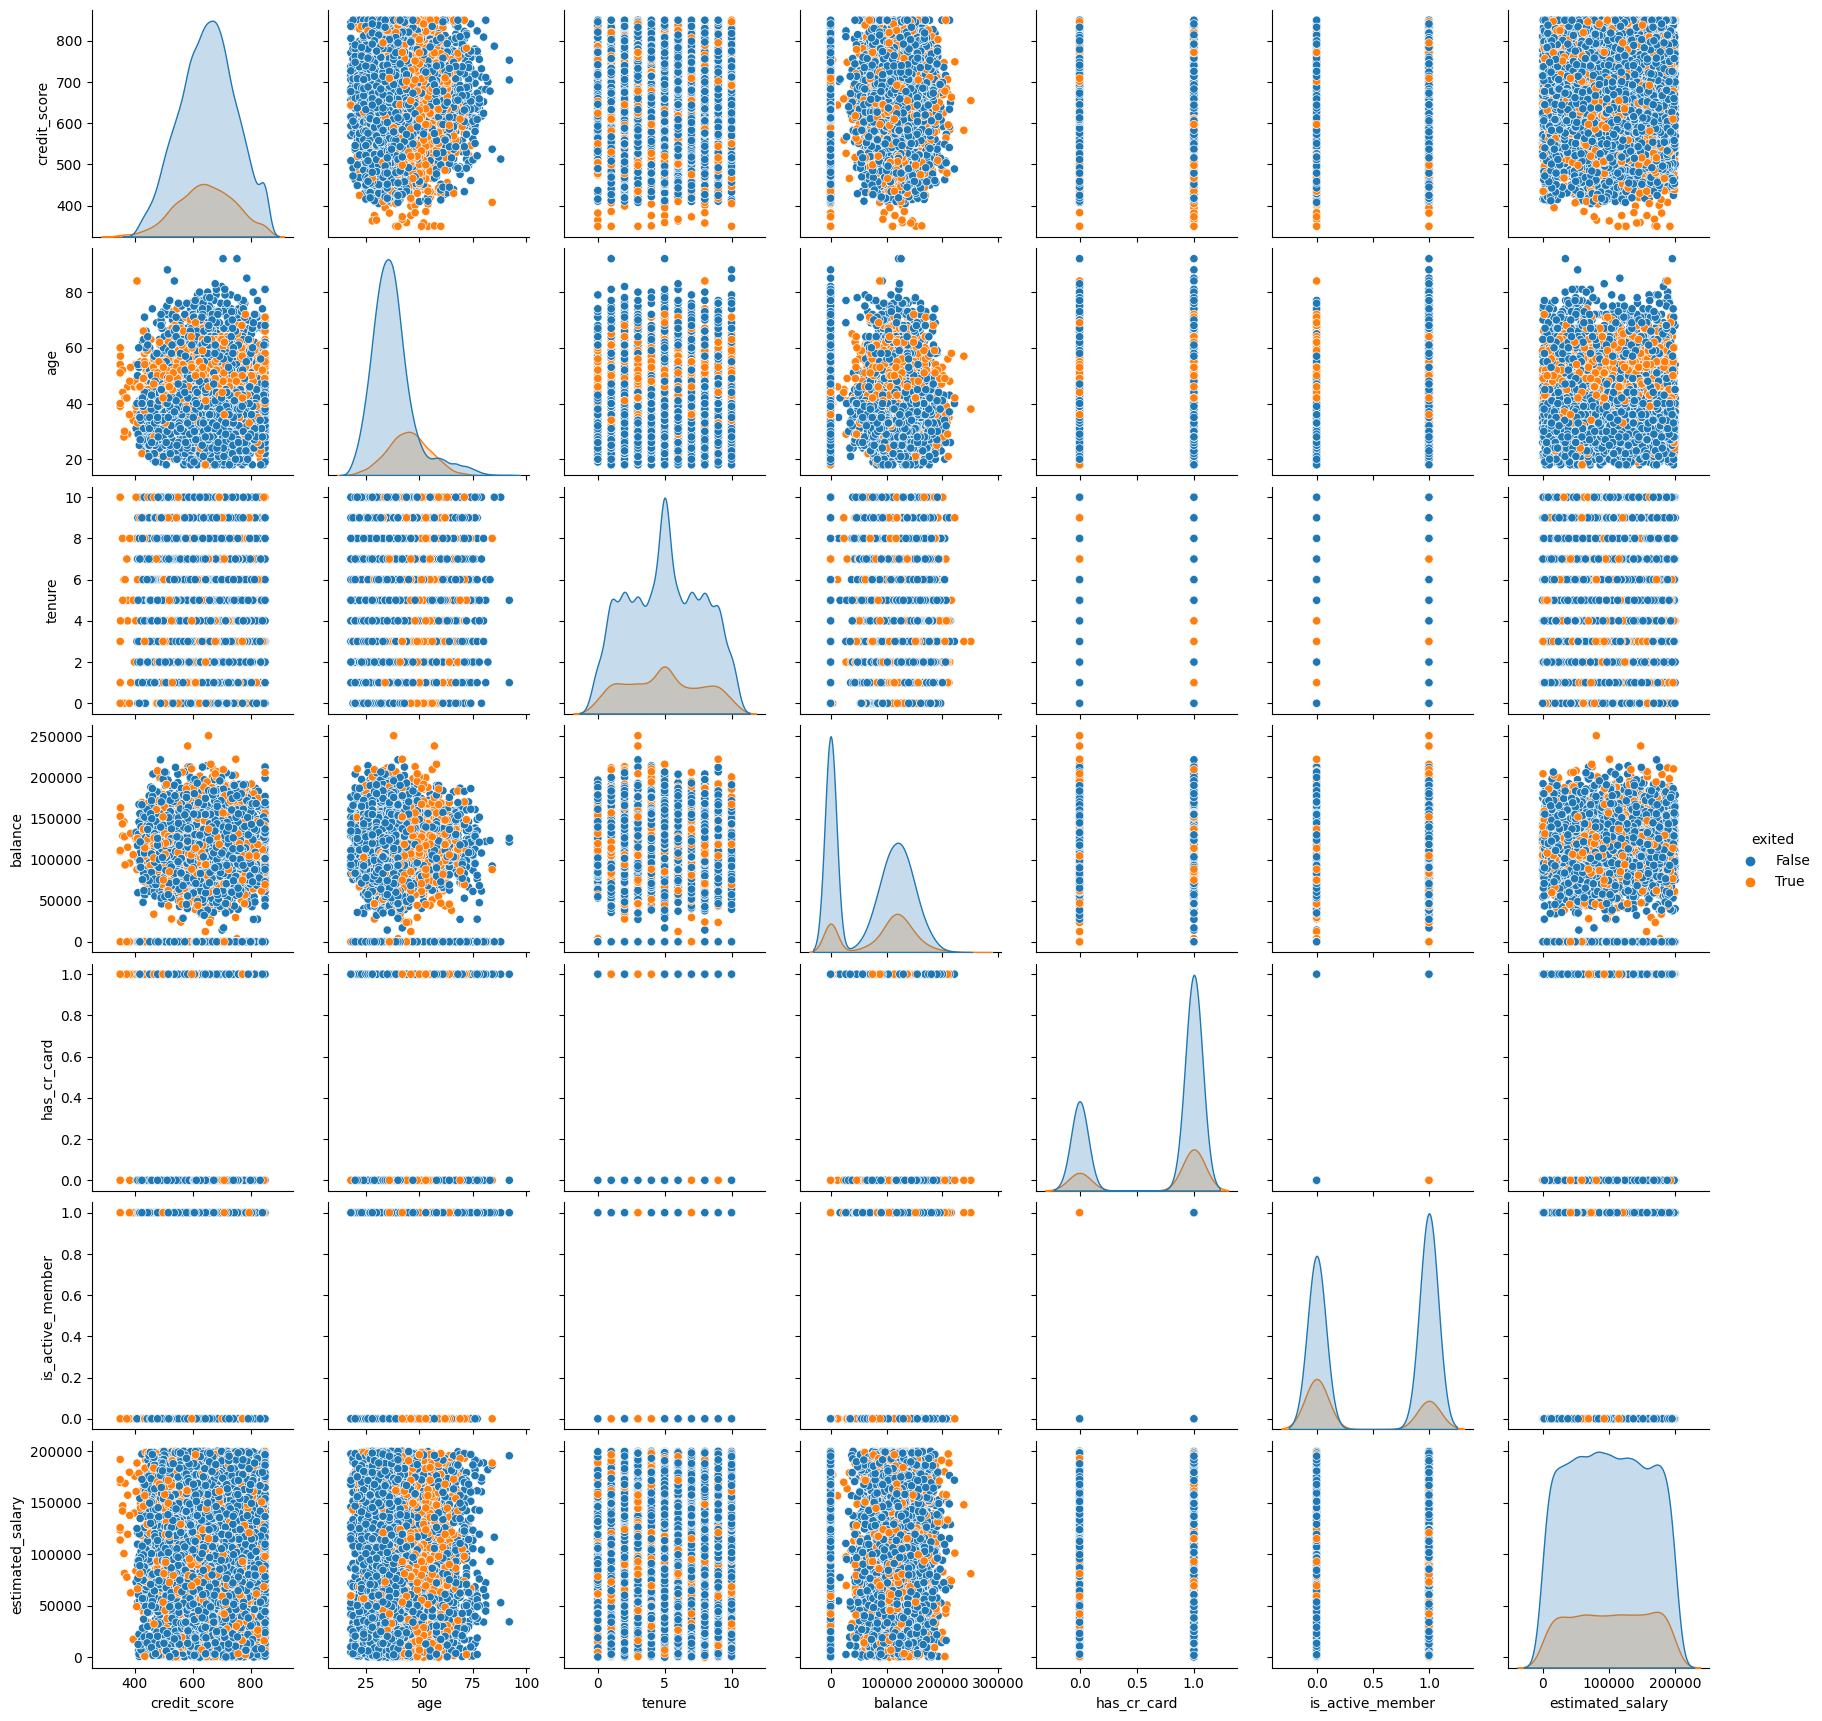

In [47]:
df_plot = df.drop(columns = ['row_number', 'customer_id', 'surname','geography','num_of_products'])
sns.pairplot(df_plot,hue='exited')
plt.show()

array([[<AxesSubplot:title={'center':'row_number'}>,
        <AxesSubplot:title={'center':'customer_id'}>,
        <AxesSubplot:title={'center':'credit_score'}>],
       [<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'tenure'}>,
        <AxesSubplot:title={'center':'balance'}>],
       [<AxesSubplot:title={'center':'num_of_products'}>,
        <AxesSubplot:title={'center':'estimated_salary'}>,
        <AxesSubplot:>]], dtype=object)

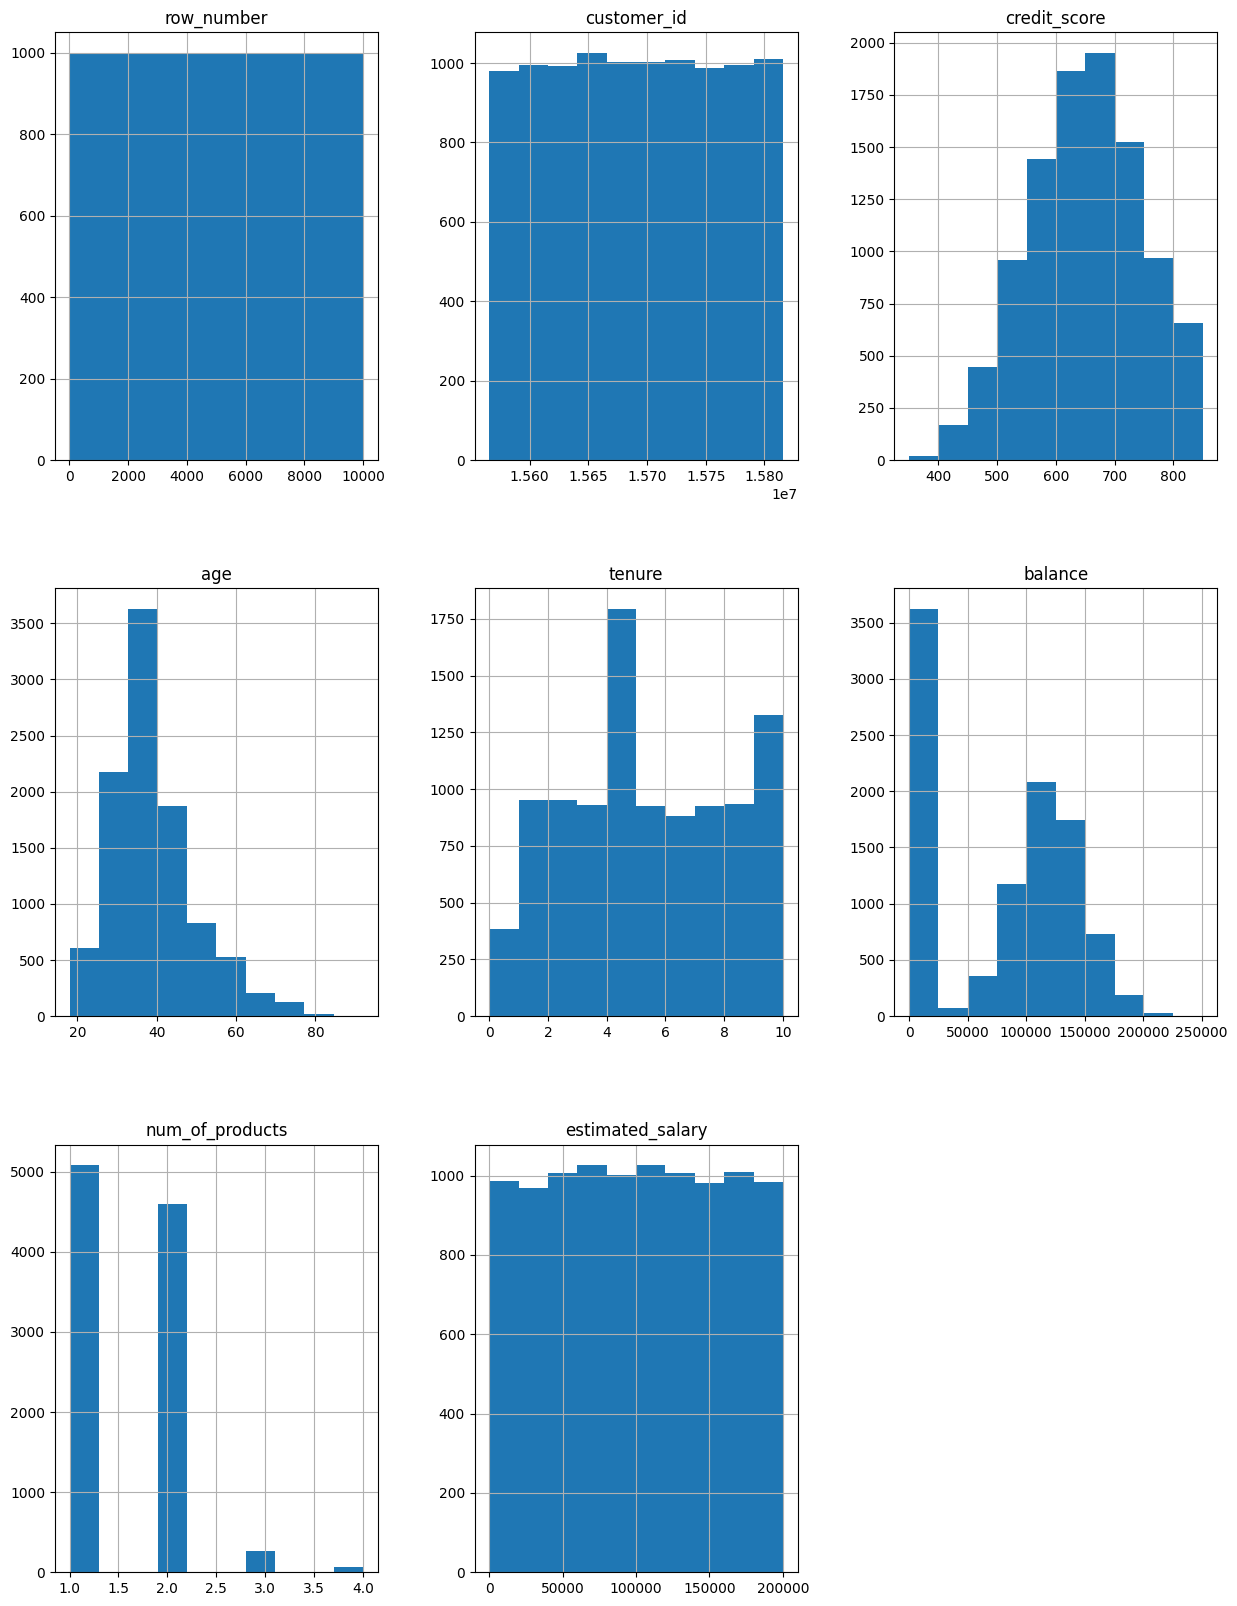

In [48]:
df.hist(figsize=(15,20))

In [49]:
df.describe()

,row_number,customer_id,credit_score,age,tenure,balance,num_of_products,estimated_salary
count,"10,000.0","10,000.0","10,000.0","10,000.0","10,000.0","10,000.0","10,000.0","10,000.0"
mean,"5,000.5","15,690,940.5694",650.5288,38.9218,4.99769002309977,"76,485.889288",1.5302,"100,090.239881"
std,"2,886.8956799071675","71,936.1861227489",96.65329873613035,10.487806451704609,2.7600103106220426,"62,397.405202385955",0.5816543579989906,"57,510.49281769816"
min,1.0,"15,565,701.0",350.0,18.0,0.0,0.0,1.0,11.58
25%,"2,500.75","15,628,528.25",584.0,32.0,3.0,0.0,1.0,"51,002.11"
50%,"5,000.5","15,690,738.0",652.0,37.0,4.997690023099769,"97,198.54000000001",1.0,"100,193.915"
75%,"7,500.25","15,753,233.75",718.0,44.0,7.0,"127,644.24",2.0,"149,388.2475"
max,"10,000.0","15,815,690.0",850.0,92.0,10.0,"250,898.09",4.0,"199,992.48"


<AxesSubplot:>

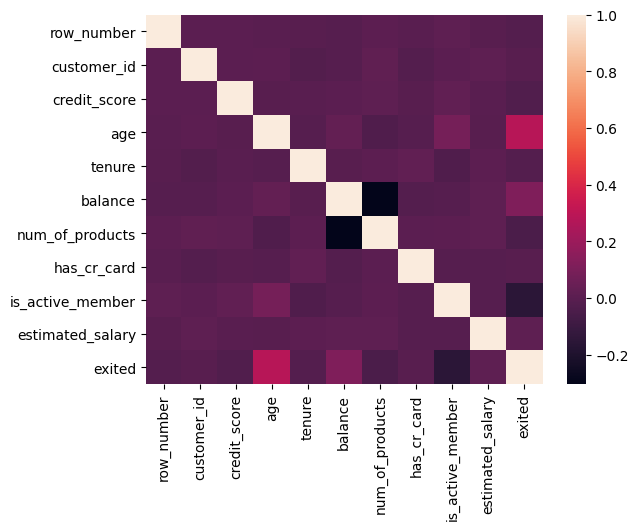

In [50]:
sns.heatmap(df.corr())

- В данных не видно корреляции между столбцами, что может быть полезным при обучении моделей
- Распределение по столбцам (кроме balance и num_of_products) близко к номальному, что также позитивно для моделей машинного обучения

### Кодирование переменных

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   row_number        10000 non-null  int64  
 1   customer_id       10000 non-null  int64  
 2   surname           10000 non-null  object 
 3   credit_score      10000 non-null  int64  
 4   geography         10000 non-null  object 
 5   gender            10000 non-null  object 
 6   age               10000 non-null  int64  
 7   tenure            10000 non-null  float64
 8   balance           10000 non-null  float64
 9   num_of_products   10000 non-null  int64  
 10  has_cr_card       10000 non-null  bool   
 11  is_active_member  10000 non-null  bool   
 12  estimated_salary  10000 non-null  float64
 13  exited            10000 non-null  bool   
dtypes: bool(3), float64(3), int64(5), object(3)
memory usage: 888.8+ KB


**Кодированое признака gender в булев тип**

In [52]:
df['gender'] = df['gender'].map({'Male': 1,'Female':0}).astype('bool')

**Разделение данных по выборкам**

In [53]:
df = df.drop(columns=['row_number', 'customer_id', 'surname'],axis=1)

In [54]:
target = df['exited']
features = df.drop(columns=['exited'],axis=1)

In [55]:
data_train, data_valid, target_train, target_valid = train_test_split(features,
                                                                   target,
                                                                   test_size=0.2,
                                                                   random_state=12345,
                                                                     stratify=target)



In [56]:
data_train,data_test,target_train,target_test = train_test_split(data_train,
                                                                 target_train,
                                                                 test_size=0.25,
                                                                 random_state=12345,
                                                                stratify=target_train)

**Mean target encoding признака geography для алгоритмов случайного леса**

In [57]:
global_mean = target_train.mean()
print(global_mean)
data_train['target'] = target_train
agg_geo = data_train.groupby('geography')['target'].agg(['count','mean'])
counts = agg_geo['count']
means = agg_geo['mean']
weight = 1000
smooth = (means*counts + weight*global_mean) / (counts+weight)
print(smooth)
data_train = data_train.drop(columns=['target'],axis=1)

0.20383333333333334
geography
France     0.1783167495854063
Germany   0.27097596992884954
Spain     0.17814710986517154
dtype: float64


In [58]:
data_train_tree = data_train.copy()
data_train_tree.loc[:,'geography'] = data_train_tree['geography'].map(smooth)
data_valid_tree = data_valid.copy()
data_valid_tree.loc[:,'geography'] = data_valid_tree['geography'].map(smooth)

**OHE кодирование признака geography для алгоритмов регрессии**

In [59]:
data_train = pd.get_dummies(data_train,columns=['geography'],drop_first=True)
data_valid = pd.get_dummies(data_valid,columns=['geography'],drop_first=True)

**Масштабирование количественных переменных для моделей регрессии**

Для масштабирования выбран алгоритм МинСМакс, так как есть данные с ненормальным распределением.

In [60]:
numeric = ['credit_score','age','tenure','balance','num_of_products','estimated_salary']

scaler = MinMaxScaler()
scaler.fit(data_train[numeric])
data_train[numeric] = scaler.transform(data_train[numeric])
data_valid[numeric] = scaler.transform(data_valid[numeric])

In [61]:
display(data_train.head())

,credit_score,gender,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,geography_Germany,geography_Spain
5536,0.572,True,0.36486486486486486,0.4997690023099769,0.0,0.3333333333333333,True,True,0.7972576718809943,0,1
8530,0.916,False,0.2027027027027027,0.2,0.4125853249819479,0.0,True,False,0.5693664723701931,0,0
1762,0.816,False,0.21621621621621623,0.1,0.6143508306500063,0.0,True,True,0.3033421157853975,0,0
9090,0.918,False,0.2837837837837838,0.5,0.0,0.0,True,False,0.38826785529999364,0,0
8777,0.5059999999999999,True,0.08108108108108109,0.1,0.658231914001418,0.3333333333333333,True,False,0.1088941849175305,0,1


### Выводы

На этапе подготовки данных:
- Была сделана предобработка данных (проверены пропуски, дублкаты, исправлено форматирование и типы данных)
- Проведен первичный анализ данных на предмет корреляции столбцов между собой и их распределения
- Проведено кодирование переменных для моделей регрессии и случайного лиса

## Исследование задачи

### Анализ дисбаланса

Первичное обучение для предсказания факта ухода клиента будет проводиться без учета дисбаланса с помощью алгоритма случайного леса. В качестве гиперпараметров будут выбраны 100 дереаьев и глубина равная 3. Далее данная модель будет сравниваться с показателями модели, обученными на данных со сбалансированными классами.

In [62]:
df_frequency = df['exited'].value_counts(normalize=True)
display(df_frequency)

False   0.7963
True    0.2037
Name: exited, dtype: float64

False   0.9705
True    0.0295
dtype: float64

              precision    recall  f1-score   support

       False       0.82      1.00      0.90      1593
        True       0.95      0.14      0.24       407

    accuracy                           0.82      2000
   macro avg       0.88      0.57      0.57      2000
weighted avg       0.85      0.82      0.77      2000



Text(170.72222222222223, 0.5, 'targets')

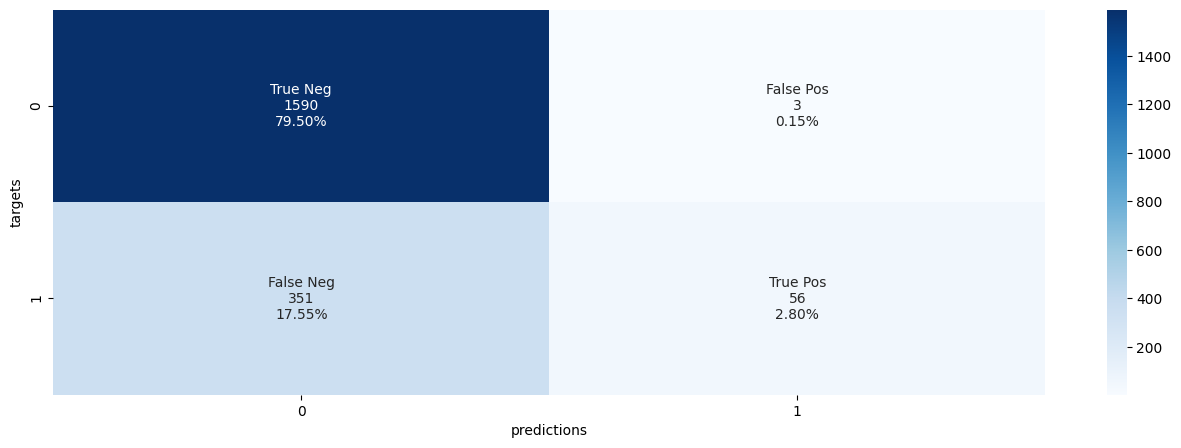

In [63]:
clf = RandomForestClassifier(random_state=12345,n_estimators=100,max_depth=3)
clf.fit(data_train_tree,target_train)
predicted_clf_disbalance = clf.predict(data_valid_tree)
tree_frequency = pd.Series(predicted_clf_disbalance).value_counts(normalize=True)

display(tree_frequency)
print(classification_report(target_valid,predicted_clf_disbalance))

cf_matrix = confusion_matrix(target_valid,predicted_clf_disbalance)

group_names = ['True Neg','False Pos','False Neg','True Pos']
test_cnf_matrix = cf_matrix
test_counts = ["{0:0.0f}".format(value) for value in test_cnf_matrix.flatten()]
test_percentage = ["{0:.2%}".format(value) for value in test_cnf_matrix .flatten()/np.sum(test_cnf_matrix)]
test_labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,test_counts,test_percentage)]
test_labels = np.asarray(test_labels).reshape(2,2)
plt.figure(figsize = (16,5))
sns.heatmap(test_cnf_matrix, annot=test_labels, fmt='', cmap='Blues')
plt.xlabel('predictions')
plt.ylabel('targets')

### Выводы

- Классы распределены в соотношении примерно 4 к 1
- Алгоритм случайного леса работает достаточно плохо на данных с таким дисбалансом
    - F1 метрика равна 0.29
    - Матрица ошибок наглядно демонстрирует, что модель хорошо прогнозирует только истинно отрицательные ответы. Интересующий нас класс истинно положительных ответов практически не прогнозируется моделью.

## Борьба с дисбалансом

Будет применено два метода исправления дисбаланса:
- балансирование по изменению веса класс в алгоритме случайного леса
- увеличение выборки для модели регрессии

 ### Исправление дисбаланса в модели случайного леса

In [67]:
for depth in range(1,20,1):
    clf = RandomForestClassifier(random_state=12345,
                                 n_estimators=100,
                                 max_depth=depth,
                                 class_weight='balanced')
    clf.fit(data_train_tree,target_train)
    predicted_clf = clf.predict(data_valid_tree)
    print(depth,clf.score(data_valid_tree,target_valid))

1 0.758
2 0.754
3 0.781
4 0.781
5 0.8065
6 0.818
7 0.8305
8 0.8325
9 0.84
10 0.846
11 0.85
12 0.8495
13 0.8505
14 0.856
15 0.8565
16 0.853
17 0.856
18 0.8565
19 0.857


In [68]:
for est in range(20,300,20):
    clf = RandomForestClassifier(random_state=12345,
                                 n_estimators=est,
                                 max_depth=14,
                                 class_weight='balanced')
    clf.fit(data_train_tree,target_train)
    predicted_clf = clf.predict(data_valid_tree)
    print(est,clf.score(data_valid_tree,target_valid))

20 0.85
40 0.853
60 0.8575
80 0.8565
100 0.856
120 0.854
140 0.855
160 0.8565
180 0.855
200 0.857
220 0.857
240 0.856
260 0.857
280 0.856


              precision    recall  f1-score   support

       False       0.88      0.96      0.91      1593
        True       0.73      0.47      0.57       407

    accuracy                           0.86      2000
   macro avg       0.80      0.71      0.74      2000
weighted avg       0.85      0.86      0.84      2000



Text(170.72222222222223, 0.5, 'targets')

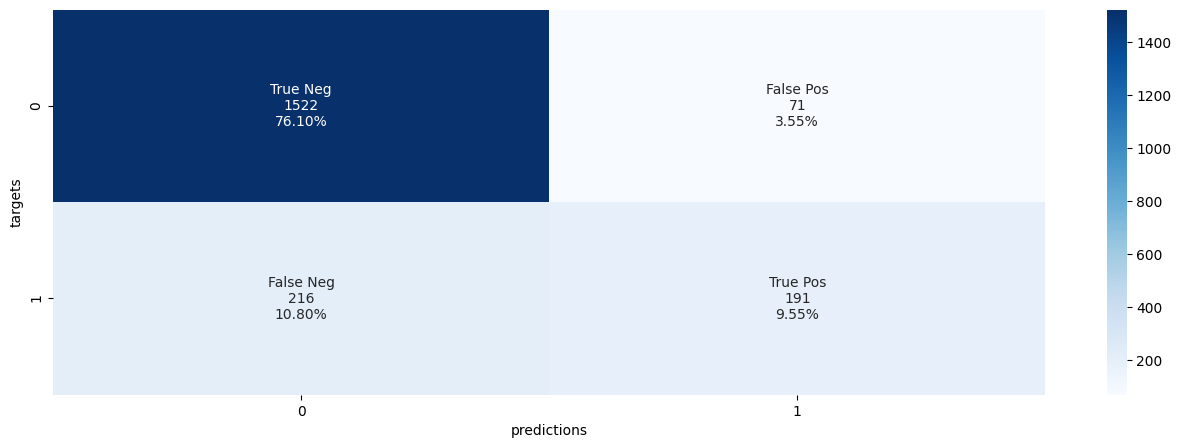

In [77]:
clf = RandomForestClassifier(random_state=12345,n_estimators=100,max_depth=15,class_weight='balanced')
clf.fit(data_train_tree,target_train)
predicted_clf = clf.predict(data_valid_tree)
print(classification_report(target_valid,predicted_clf))

cf_matrix = confusion_matrix(target_valid,predicted_clf)

group_names = ['True Neg','False Pos','False Neg','True Pos']
test_cnf_matrix = cf_matrix
test_counts = ["{0:0.0f}".format(value) for value in test_cnf_matrix.flatten()]
test_percentage = ["{0:.2%}".format(value) for value in test_cnf_matrix .flatten()/np.sum(test_cnf_matrix)]
test_labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,test_counts,test_percentage)]
test_labels = np.asarray(test_labels).reshape(2,2)
plt.figure(figsize = (16,5))
sns.heatmap(test_cnf_matrix, annot=test_labels, fmt='', cmap='Blues')
plt.xlabel('predictions')
plt.ylabel('targets')

Использая алгоритм случайного леса со сбалансированными весами удалось увеличить F1 метрику в два раза до 0.61, а количество истинного положительных ответов выросло почти в 4 раза (c 74 до 233). 

### Исправление дисбаланса в алгоритме регрессии

In [78]:
train_frequency = target_train.value_counts(normalize=True)
display(train_frequency)

False    0.7961666666666667
True    0.20383333333333334
Name: exited, dtype: float64

In [79]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled

features_upsampled, target_upsampled = upsample(data_train, target_train, 4)


In [80]:
reg = LogisticRegression(random_state=12345)
reg.fit(features_upsampled, target_upsampled)
predicted_reg = reg.predict(data_valid)
print(classification_report(target_valid,predicted_reg))

              precision    recall  f1-score   support

       False       0.91      0.69      0.79      1593
        True       0.38      0.74      0.50       407

    accuracy                           0.70      2000
   macro avg       0.65      0.72      0.65      2000
weighted avg       0.80      0.70      0.73      2000



При использовании метода увеличения выборки в алгоритме логистической регрессии метрика F1 оказалось хуже, чем у алгоритма случайного леса (0.5).

### Выводы

- Исправление дисбаланса классов помогло значительно улулчшить способность моделей предсказывать факт ухода клиента из банка.
- Для алгоритма случайного леса на валидационной выборке удалось достичь значения F1 меры 0.61, что выше порогового значения для задачи.
- Модель логистической регрессии показала результат хуже - F1 метрика выросла только до 0.5.

## Тестирование модели

Тестирование будет проводиться на основе алгоритма случайного леса.

In [81]:
data_test_tree = data_test.copy()
data_test_tree.loc[:,'geography'] = data_test_tree['geography'].map(smooth)

In [82]:
predicted_clf = clf.predict(data_test_tree)
print(classification_report(target_test,predicted_clf))

              precision    recall  f1-score   support

       False       0.88      0.96      0.92      1593
        True       0.74      0.47      0.58       407

    accuracy                           0.86      2000
   macro avg       0.81      0.72      0.75      2000
weighted avg       0.85      0.86      0.85      2000



Требуемое значение F1 метрики 0.59 достигнуто. 

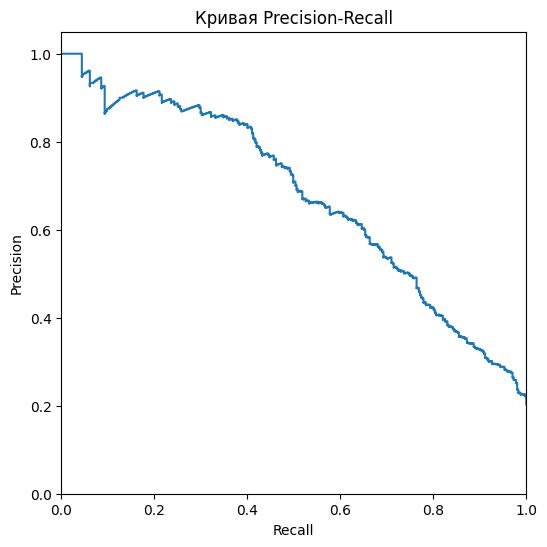

In [83]:
prob_test = clf.predict_proba(data_test_tree)
precision, recall, thresholds = precision_recall_curve(target_test, prob_test[:, 1])

plt.figure(figsize=(6, 6))
plt.step(recall, precision, where='post')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Кривая Precision-Recall')
plt.show() 


Для определения наиболее оптимального соотношения PR метрик необходима дополнительная консультация с заказчиком, так как не предоставлено информации о том, что для банка выгоднее: таргетировать большую часть клиентов банка как потенциальных претендентов на закрытие счета (то есть повышать метрику полноты до единицы), либо таргетировать только тех клиентов, в лояльности которых модель больше всего не уверена, но при этом пренебречь частью клиентов, которых модель не смогла идентифицировать как потенциальных кандидатов на закрытие счета (то есть, довести значение метрики точности до единицы).

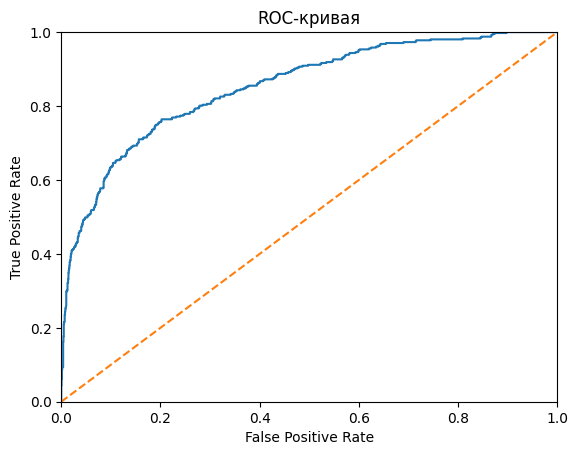

0.8525960475113019


In [84]:
fpr, tpr, thresholds = roc_curve(target_test, prob_test[:,1])

plt.figure()
plt.plot(fpr, tpr)

plt.plot([0, 1], [0, 1], linestyle='--')

plt.xlim(0,1)
plt.ylim(0,1)

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

plt.title("ROC-кривая")
plt.show()

auc_roc = roc_auc_score(target_test,prob_test[:,1])
print(auc_roc)


Метрика AUC-ROC равна 86%, что больше значения 50% константной модели. При этом для вероятности положительного класса 50% полнота равна 0.57, а FPR всего около 10%, что также значительно лучше метрик константной модели.

## Итоговые выводы

- Первым этапом была проведена предобработка данных и кодирование количественных и категориальный переменных.
- Далее было проведено исследование алгоритма без учета дисбаланса в данных. F1 метрика такого алгоритма была меньше порогового значения в два раза.
- Дисбаланс был исправлен взвешиванием классов в алгоритме случайного леса и увеличением выборки в алгоритме регрессии. Далее для тестирования модели был выбран алгоритм случайного леса, так как этот алгоритм показал внешающие доверия результаты на валидационной выборке.
- На тестовой выборке было достигнуто целевое значение F1 метрики 0.59. Значение AUC-ROC составило 85%.
- В качестве следующего этапа развития проекта предлагается получить дополнительные данные о стоимости удержания клиента, а также об альтернатнативных издержках при уходе очередного клиента. Эти данные будут использованы для проведения дальнейшего анализа с целью подбора наиболее оптимальной вероятности ухода клиента и выявления наиболее подходящих метрик полноты и точности для данного проекта.

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнен шаг 1: данные подготовлены
- [x]  Выполнен шаг 2: задача исследована
    - [x]  Исследован баланс классов
    - [x]  Изучены модели без учёта дисбаланса
    - [x]  Написаны выводы по результатам исследования
- [x]  Выполнен шаг 3: учтён дисбаланс
    - [x]  Применено несколько способов борьбы с дисбалансом
    - [x]  Написаны выводы по результатам исследования
- [x]  Выполнен шаг 4: проведено тестирование
- [x]  Удалось достичь *F1*-меры не менее 0.59
- [x]  Исследована метрика *AUC-ROC*